[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


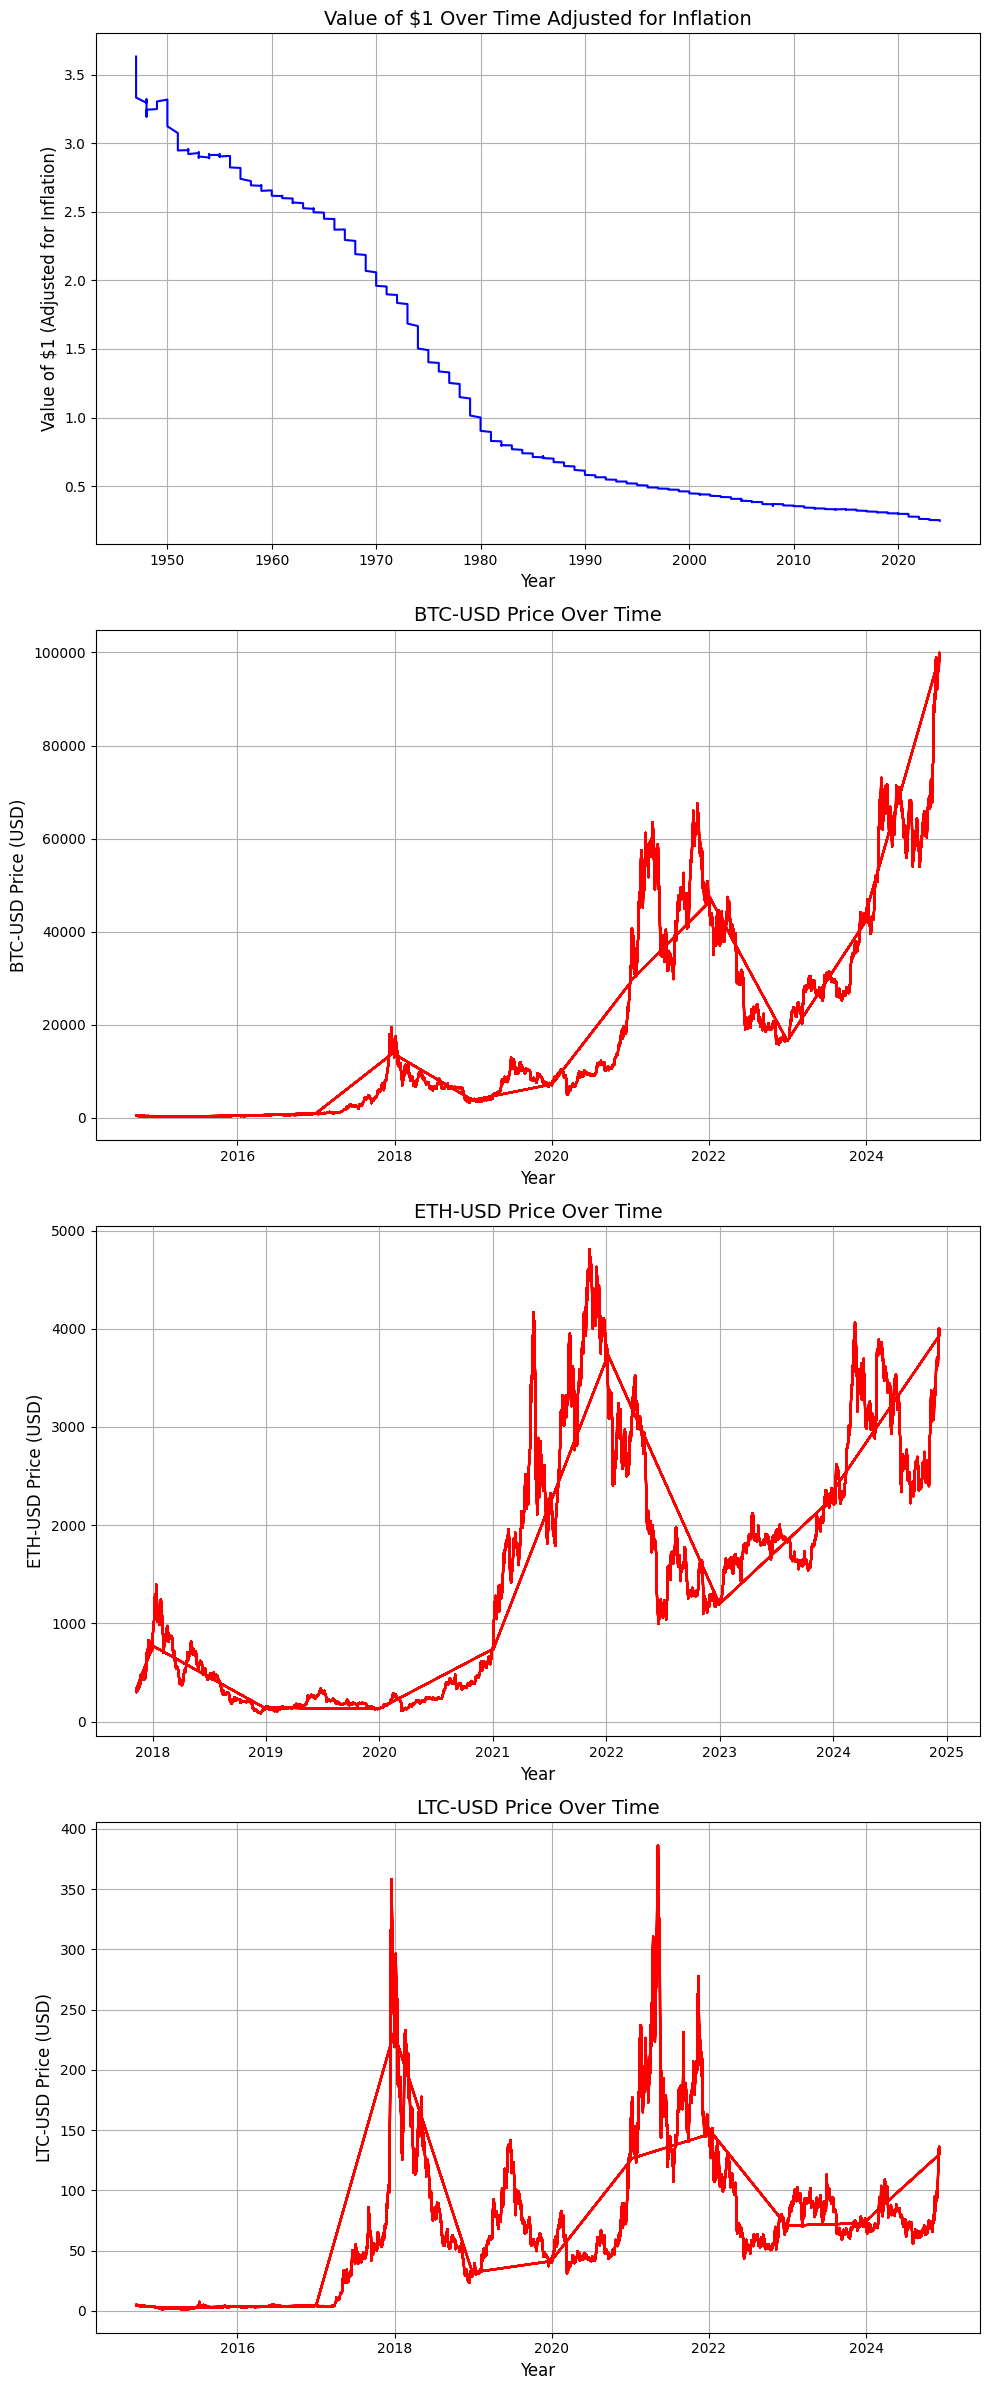

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fredapi import Fred
import yfinance as yf

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='')

# Fetch CPI data from FRED starting from 1913
cpi_data = fred.get_series('CPIAUCSL', observation_start='1913-01-01')

# Create a DataFrame from the data
df = pd.DataFrame({'CPI': cpi_data})
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)
df['Year'] = df['Date'].dt.year

# Calculate the value of $1 in each year relative to the base year (1980)
base_year_cpi = df.loc[df['Year'] == 1980, 'CPI'].values[0]
df['Value_of_1_Dollar'] = base_year_cpi / df['CPI']

# List of cryptocurrencies to fetch data for
crypto_symbols = ['BTC-USD', 'ETH-USD', 'LTC-USD']  # Add more symbols as needed

# Create subplots
fig, axes = plt.subplots(len(crypto_symbols) + 1, 1, figsize=(10, 6 * (len(crypto_symbols) + 1)))

# Plot the value of $1
axes[0].plot(df['Year'], df['Value_of_1_Dollar'], label="Value of $1 adjusted for inflation", color='b')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Value of $1 (Adjusted for Inflation)', fontsize=12)
axes[0].set_title('Value of $1 Over Time Adjusted for Inflation', fontsize=14)
axes[0].grid(True)

# Fetch and plot data for each cryptocurrency
for i, symbol in enumerate(crypto_symbols):
    crypto_data = yf.download(symbol, start='2010-01-01')
    crypto_data.reset_index(inplace=True)
    crypto_data['Year'] = crypto_data['Date'].dt.year
    
    # Merge the CPI and cryptocurrency data on the Year column
    merged_df = pd.merge(df, crypto_data, on='Year', how='inner')
    
    # Plot cryptocurrency price
    axes[i + 1].plot(merged_df['Date_y'], merged_df['Close'], label=f"{symbol} Price (USD)", color='r')
    axes[i + 1].set_xlabel('Year', fontsize=12)
    axes[i + 1].set_ylabel(f"{symbol} Price (USD)", fontsize=12)
    axes[i + 1].set_title(f"{symbol} Price Over Time", fontsize=14)
    axes[i + 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


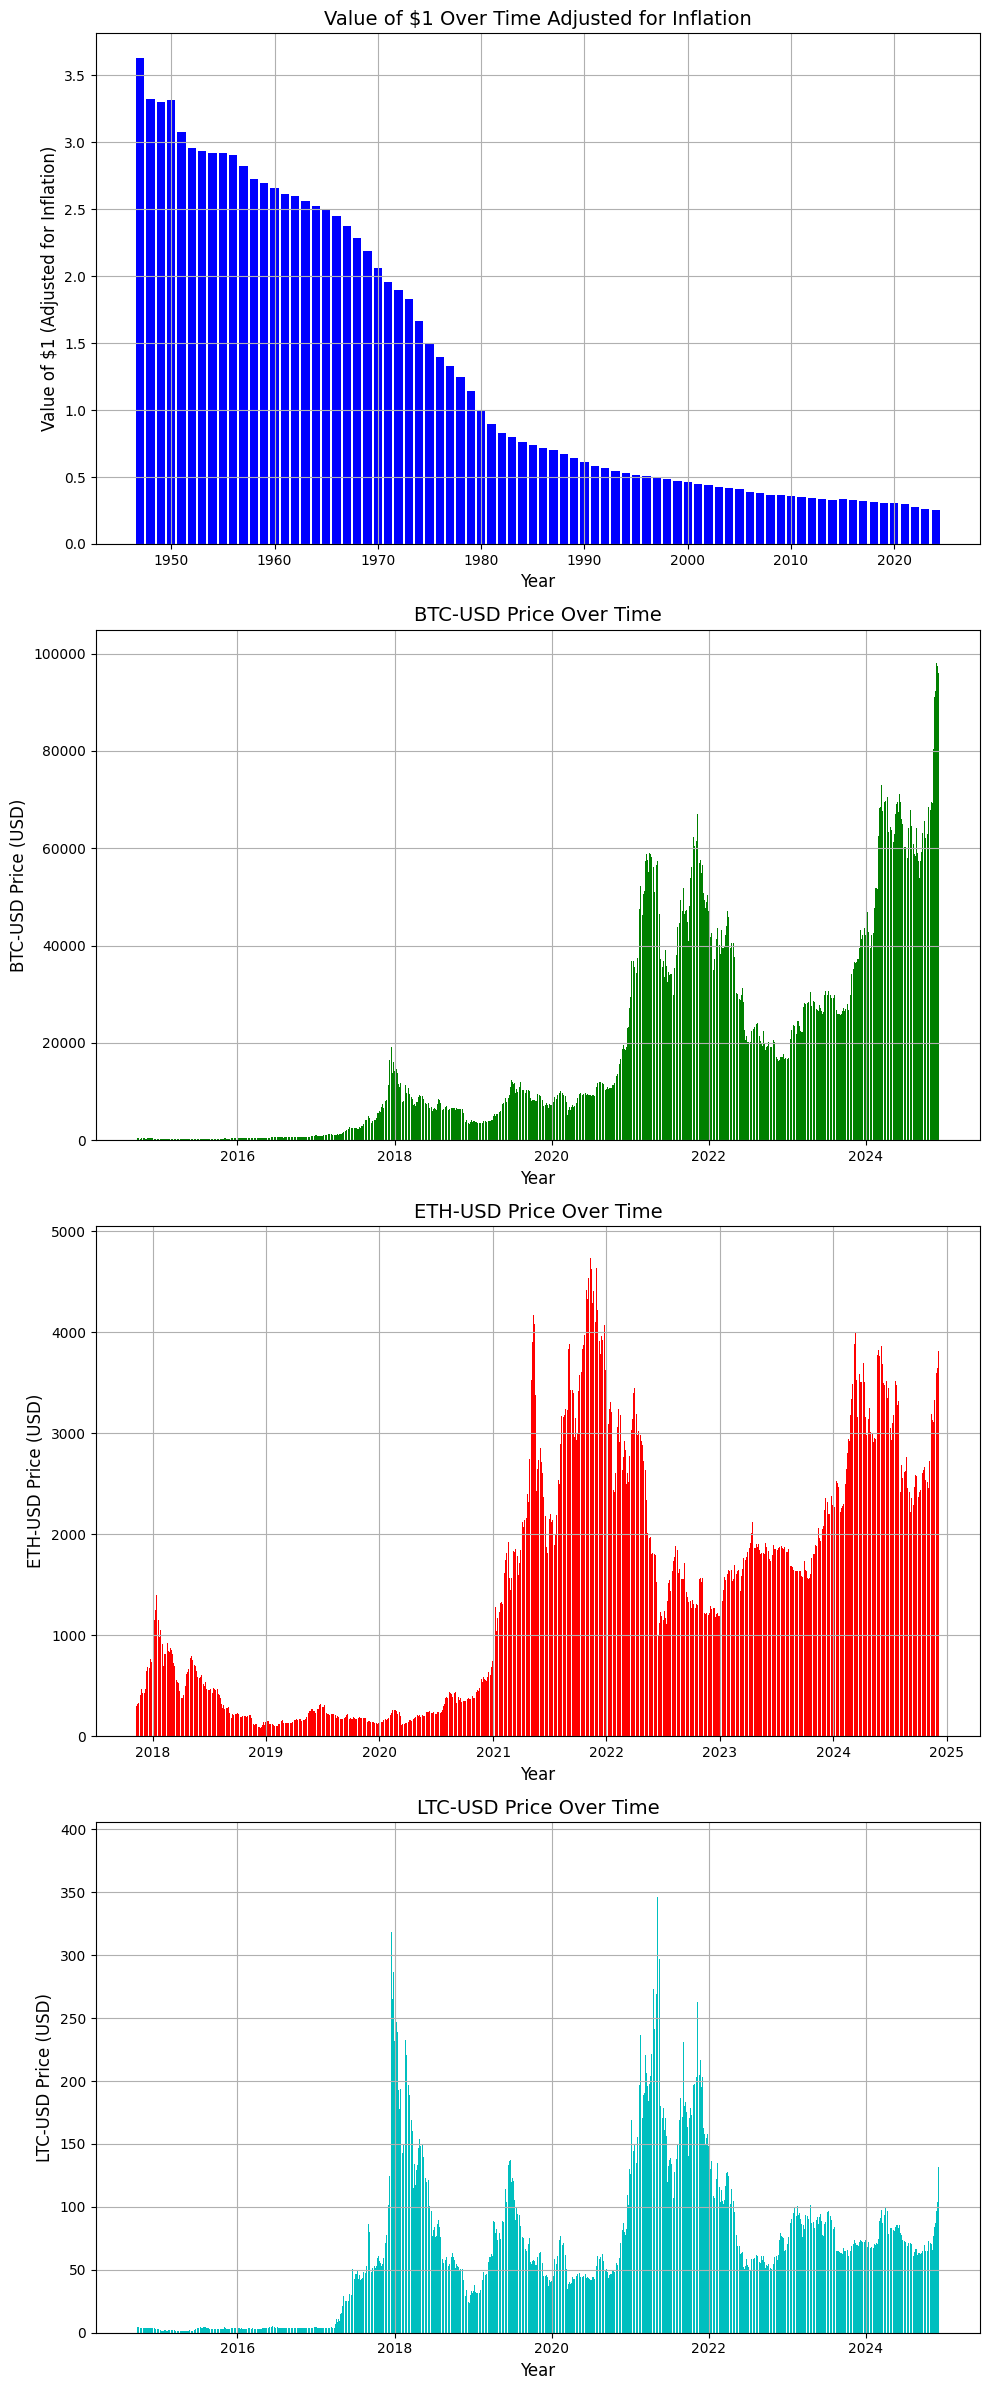

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fredapi import Fred
import yfinance as yf

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key='')

# Fetch CPI data from FRED starting from 1913
cpi_data = fred.get_series('CPIAUCSL', observation_start='1913-01-01')

# Create a DataFrame from the data
df = pd.DataFrame({'CPI': cpi_data})
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)
df['Year'] = df['Date'].dt.year

# Calculate the value of $1 in each year relative to the base year (1980)
base_year_cpi = df.loc[df['Year'] == 1980, 'CPI'].values[0]
df['Value_of_1_Dollar'] = base_year_cpi / df['CPI']

# List of cryptocurrencies to fetch data for
crypto_symbols = ['BTC-USD', 'ETH-USD', 'LTC-USD']  # Add more symbols as needed
bar_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # List of colors for the bars

# Create subplots
fig, axes = plt.subplots(len(crypto_symbols) + 1, 1, figsize=(10, 6 * (len(crypto_symbols) + 1)))

# Plot the value of $1
axes[0].bar(df['Year'], df['Value_of_1_Dollar'], color=bar_colors[0])
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Value of $1 (Adjusted for Inflation)', fontsize=12)
axes[0].set_title('Value of $1 Over Time Adjusted for Inflation', fontsize=14)
axes[0].grid(True)

# Fetch and plot data for each cryptocurrency
for i, symbol in enumerate(crypto_symbols):
    crypto_data = yf.download(symbol, start='2010-01-01')
    crypto_data.reset_index(inplace=True)
    crypto_data['Year'] = crypto_data['Date'].dt.year
    
    # Merge the CPI and cryptocurrency data on the Year column
    merged_df = pd.merge(df, crypto_data, on='Year', how='inner')
    
    # Plot cryptocurrency price
    axes[i + 1].bar(merged_df['Date_y'], merged_df['Close'], color=bar_colors[i + 1])
    axes[i + 1].set_xlabel('Year', fontsize=12)
    axes[i + 1].set_ylabel(f"{symbol} Price (USD)", fontsize=12)
    axes[i + 1].set_title(f"{symbol} Price Over Time", fontsize=14)
    axes[i + 1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()